In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loantrain = pd.read_csv("train.csv")
loantest = pd.read_csv("test.csv")

In [4]:
print('Train Shape ', loantrain.shape)
print("Test Shape ", loantest.shape)

Train Shape  (614, 13)
Test Shape  (367, 12)


In [6]:
loantrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
loantrain.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


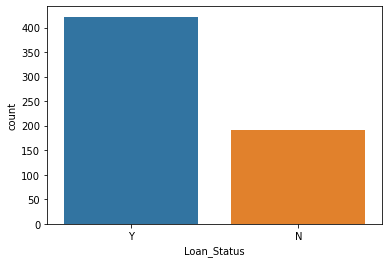

In [8]:
sns.countplot(loantrain.Loan_Status)

In [9]:
loantrain.Loan_Status.value_counts()#Target Column - Data is not evenly Distributed, we have more entries for Yes

Y    422
N    192
Name: Loan_Status, dtype: int64

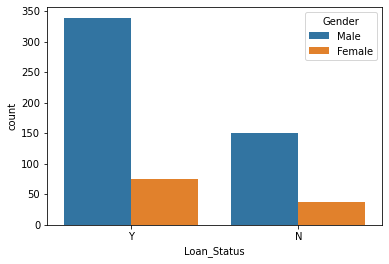

In [10]:
#Gender based Loan Statuses
sns.countplot(loantrain.Loan_Status, hue = loantrain.Gender)#Males Have COmparatively Highly Applied for Loan

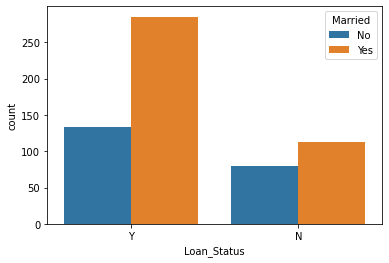

In [11]:
#Marital Status Based Distribution 
sns.countplot(loantrain.Loan_Status, hue = loantrain.Married) #For Married People Loan Approval is High

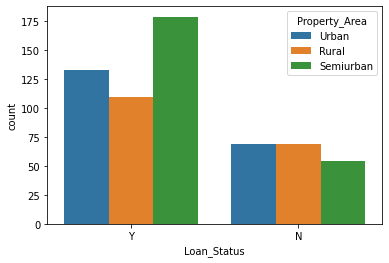

In [12]:
#Property Area Based Approval of Loans
sns.countplot(loantrain.Loan_Status, hue = loantrain.Property_Area)#Maximum Approvals for SemiUrban Area followed by Urban and Rural

In [14]:
loantrain.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
loantrain.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [16]:
loantest.isnull().sum().sort_values(ascending = False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64

In [20]:
loantrain.Credit_History.value_counts()#There are only two Categroies 1 and 0 

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [21]:
y = loantrain.Loan_Status

In [23]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [24]:
#Adding an Identifier Column to Segregate the Data back to Train and Test
loantrain['Type'] = 'Train'
loantest['Type'] = 'Test'

In [28]:
#Combining Both DataFrames for cleaning Purpose
combine = pd.concat([loantrain.drop('Loan_Status', axis=1), loantest], axis = 0)

In [29]:
combine.shape

(981, 13)

In [30]:
combine.isnull().sum().sort_values(ascending = False)

Credit_History       79
Self_Employed        55
LoanAmount           27
Dependents           25
Gender               24
Loan_Amount_Term     20
Married               3
Type                  0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [31]:
objectdata = combine.select_dtypes(include=np.object)
numericdata = combine.select_dtypes(include = np.number)

In [32]:
objectdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Type
0,LP001002,Male,No,0,Graduate,No,Urban,Train
1,LP001003,Male,Yes,1,Graduate,No,Rural,Train
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Train
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Train
4,LP001008,Male,No,0,Graduate,No,Urban,Train


In [33]:
objectdata.shape

(981, 8)

In [35]:
objectdata.Loan_ID.str.replace("LP00", "")

0      1002
1      1003
2      1005
3      1006
4      1008
       ... 
362    2971
363    2975
364    2980
365    2986
366    2989
Name: Loan_ID, Length: 981, dtype: object

In [36]:
objectdata.Loan_ID.nunique()#Loan_ID Doesnt add any info to the data Dropping it would be rather more useful

981

In [37]:
objectdata.drop('Loan_ID', axis = 1, inplace = True)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
objectdata.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Type'],
      dtype='object')

In [40]:
#ImputeMissing Values for Object Data using Simple Imputer
from sklearn.impute import SimpleImputer

In [44]:
objectimpute = SimpleImputer(missing_values=np.nan , strategy='most_frequent')

In [46]:
objectdf = objectimpute.fit_transform(objectdata)

In [48]:
objectdf = pd.DataFrame(objectdf, columns = list(objectdata.columns))

In [49]:
objectdf

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Type
0,Male,No,0,Graduate,No,Urban,Train
1,Male,Yes,1,Graduate,No,Rural,Train
2,Male,Yes,0,Graduate,Yes,Urban,Train
3,Male,Yes,0,Not Graduate,No,Urban,Train
4,Male,No,0,Graduate,No,Urban,Train
...,...,...,...,...,...,...,...
976,Male,Yes,3+,Not Graduate,Yes,Urban,Test
977,Male,Yes,0,Graduate,No,Urban,Test
978,Male,No,0,Graduate,No,Semiurban,Test
979,Male,Yes,0,Graduate,No,Rural,Test


In [50]:
objectdf.isnull().sum()#No Missing Values for Object Data

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Type             0
dtype: int64

In [51]:
#Looking at Dependents Column
objectdf.Dependents.value_counts()#3+ can be replaced with 3

0     570
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [55]:
objectdf.Dependents.replace("3+", "3", inplace = True)

In [56]:
objectdf.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Type
0,Male,No,0,Graduate,No,Urban,Train
1,Male,Yes,1,Graduate,No,Rural,Train
2,Male,Yes,0,Graduate,Yes,Urban,Train
3,Male,Yes,0,Not Graduate,No,Urban,Train
4,Male,No,0,Graduate,No,Urban,Train
5,Male,Yes,2,Graduate,Yes,Urban,Train
6,Male,Yes,0,Not Graduate,No,Urban,Train
7,Male,Yes,3,Graduate,No,Semiurban,Train
8,Male,Yes,2,Graduate,No,Urban,Train
9,Male,Yes,1,Graduate,No,Semiurban,Train


In [57]:
objectdf.describe()#Data Seems to be consistent - No Unwanted Inputs

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Type
count,981,981,981,981,981,981,981
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Train
freq,799,634,570,763,862,349,614


In [58]:
#Dependents Columns can be treated as number as it represents the number of Dependents
objectdf.Dependents = pd.to_numeric(objectdf.Dependents, errors='coerce')

In [59]:
objectdf.dtypes

Gender           object
Married          object
Dependents        int64
Education        object
Self_Employed    object
Property_Area    object
Type             object
dtype: object

In [60]:
#Missing Value Imputation For Numeric Data
numericdata.isnull().sum().sort_values(ascending = False)

Credit_History       79
LoanAmount           27
Loan_Amount_Term     20
CoapplicantIncome     0
ApplicantIncome       0
dtype: int64

In [61]:
numericdata.shape

(981, 5)

In [63]:
numericdata.describe()#Loan Applicant Income Seems to be 0 for Some entries

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [72]:
numericdata.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [75]:
loantest[loantest.ApplicantIncome == 0]#Loantest has two entries with 0 Applicant Income

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Type
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural,Test
116,LP001607,Female,No,0,Not Graduate,No,0,1760,180.0,360.0,1.0,Semiurban,Test


In [76]:
from sklearn.impute import SimpleImputer

In [80]:
numericimpute = SimpleImputer(missing_values=np.nan, strategy="median")#As Mean for Some COlumns Deviates a lot from Median

In [81]:
numericdf = numericimpute.fit_transform(numericdata)

In [83]:
numericdf = pd.DataFrame(numericdf, columns = list(numericdata.columns))

In [84]:
numericdf

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,126.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
976,4009.0,1777.0,113.0,360.0,1.0
977,4158.0,709.0,115.0,360.0,1.0
978,3250.0,1993.0,126.0,360.0,1.0
979,5000.0,2393.0,158.0,360.0,1.0


In [85]:
numericdf.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [141]:
scale = StandardScaler()

In [143]:
numericdf = scale.fit_transform(numericdf)

In [145]:
numericdf = pd.DataFrame(numericdf , columns=list(numericdata))

In [146]:
numericdf

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.117565,-0.589506,-0.210291,0.270528,0.42151
1,-0.104844,-0.034561,-0.184098,0.270528,0.42151
2,-0.382944,-0.589506,-0.996077,0.270528,0.42151
3,-0.456202,0.278239,-0.288869,0.270528,0.42151
4,0.144093,-0.589506,-0.013844,0.270528,0.42151
...,...,...,...,...,...
976,-0.205684,0.064431,-0.380544,0.270528,0.42151
977,-0.179508,-0.328594,-0.354351,0.270528,0.42151
978,-0.339024,0.143919,-0.210291,0.270528,0.42151
979,-0.031586,0.291119,0.208795,0.270528,0.42151


In [86]:
#Label Encoding Object data
from sklearn.preprocessing import LabelEncoder

In [87]:
le = LabelEncoder()

In [88]:
objectdatadf = objectdf.drop('Dependents', axis = 1)

In [89]:
objectdatadf = objectdatadf.apply(le.fit_transform)

In [90]:
objectdatadf

,Gender,Married,Education,Self_Employed,Property_Area,Type
0,1,0,0,0,2,1
1,1,1,0,0,0,1
2,1,1,0,1,2,1
3,1,1,1,0,2,1
4,1,0,0,0,2,1
...,...,...,...,...,...,...
976,1,1,1,1,2,0
977,1,1,0,0,2,0
978,1,0,0,0,1,0
979,1,1,0,0,0,0


In [91]:
objectdatadf['Dependents'] = objectdf.Dependents

In [94]:
objectdata.Type.value_counts()

Train    614
Test     367
Name: Type, dtype: int64

In [95]:
#Now Data is ready for Modelling
objectdatadf.Type.value_counts() #1 - Train and 0 - Test

1    614
0    367
Name: Type, dtype: int64

In [147]:
combinedf = pd.concat([objectdatadf, numericdf], axis = 1)

In [148]:
combinedf

,Gender,Married,Education,Self_Employed,Property_Area,Type,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,2,1,0,0.117565,-0.589506,-0.210291,0.270528,0.42151
1,1,1,0,0,0,1,1,-0.104844,-0.034561,-0.184098,0.270528,0.42151
2,1,1,0,1,2,1,0,-0.382944,-0.589506,-0.996077,0.270528,0.42151
3,1,1,1,0,2,1,0,-0.456202,0.278239,-0.288869,0.270528,0.42151
4,1,0,0,0,2,1,0,0.144093,-0.589506,-0.013844,0.270528,0.42151
...,...,...,...,...,...,...,...,...,...,...,...,...
976,1,1,1,1,2,0,3,-0.205684,0.064431,-0.380544,0.270528,0.42151
977,1,1,0,0,2,0,0,-0.179508,-0.328594,-0.354351,0.270528,0.42151
978,1,0,0,0,1,0,0,-0.339024,0.143919,-0.210291,0.270528,0.42151
979,1,1,0,0,0,0,0,-0.031586,0.291119,0.208795,0.270528,0.42151


In [149]:
traindf = combinedf[combinedf.Type == 1]
testdf = combinedf[combinedf.Type == 0]

In [150]:
traindf.shape

(614, 12)

In [151]:
testdf.shape

(367, 12)

In [154]:
traindf.drop('Type', axis = 1, inplace=True)
testdf.drop('Type', axis = 1, inplace=True)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [159]:
models = []
models.append(('LogReg', LogisticRegression(max_iter=1000)))
models.append(('Dec', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=1000)))
models.append(('XGB', XGBRFClassifier(n_estimators = 1000)))
models.append(('SVM', SVC()))

In [160]:
names = []
score = []

In [161]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    cvscore = cross_val_score(model, traindf, y, cv = 5)
    names.append(name)
    score.append(cvscore)
    msg = "%s %f (%f)"%(name, cvscore.mean(), cvscore.std())
    print(msg)

LogReg 0.804572 (0.026131)
Dec 0.734560 (0.035246)
RF 0.791563 (0.030037)


D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[21:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Text(0, 0, 'LogReg'),
 Text(0, 0, 'Dec'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'XGB'),
 Text(0, 0, 'SVM')]

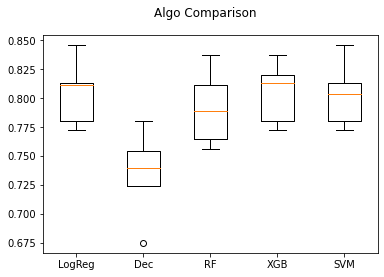

In [162]:
fig = plt.figure()
fig.suptitle('Algo Comparison')
ax = fig.add_subplot(111)
plt.boxplot(score)
ax.set_xticklabels(names)

In [119]:
from sklearn.svm import SVC

In [120]:
svm = SVC()

In [122]:
svmmodel = svm.fit(scaleddatatrain,y)

In [123]:
svmmodel.score(scaleddatatrain, y)

0.8241042345276873

In [124]:
ypred = svmmodel.predict(scaleddatatrain)

In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(y, ypred))

              precision    recall  f1-score   support

           N       0.95      0.46      0.62       192
           Y       0.80      0.99      0.89       422

    accuracy                           0.82       614
   macro avg       0.87      0.73      0.75       614
weighted avg       0.85      0.82      0.80       614



In [127]:
ytest = svmmodel.predict(scaleddatatest)

In [128]:
ytest

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [129]:
ytest = pd.Series(ytest)

In [130]:
ytest.to_csv("result.csv")

In [131]:
from sklearn.naive_bayes import GaussianNB

In [132]:
nb = GaussianNB()

In [138]:
nbmodel = nb.fit(scaleddatatrain, y)

In [139]:
nbmodel.score(scaleddatatrain, y)

0.7996742671009772

In [140]:
scaleddatatrain

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.472343,-1.372089,-0.528362,-0.392601,1.223298,-0.737806,0.072991,-0.554487,-0.234143,0.273231,0.411733
1,0.472343,0.728816,-0.528362,-0.392601,-1.318513,0.253470,-0.134412,-0.038732,-0.210349,0.273231,0.411733
2,0.472343,0.728816,-0.528362,2.547117,1.223298,-0.737806,-0.393747,-0.554487,-0.947964,0.273231,0.411733
3,0.472343,0.728816,1.892641,-0.392601,1.223298,-0.737806,-0.462062,0.251980,-0.305525,0.273231,0.411733
4,0.472343,-1.372089,-0.528362,-0.392601,1.223298,-0.737806,0.097728,-0.554487,-0.055687,0.273231,0.411733
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.528362,-0.392601,-1.318513,-0.737806,-0.410130,-0.554487,-0.888479,0.273231,0.411733
610,0.472343,0.728816,-0.528362,-0.392601,-1.318513,2.236021,-0.212557,-0.554487,-1.257286,-2.522836,0.411733
611,0.472343,0.728816,-0.528362,-0.392601,1.223298,0.253470,0.437174,-0.472404,1.276779,0.273231,0.411733
612,0.472343,0.728816,-0.528362,-0.392601,1.223298,1.244745,0.357064,-0.554487,0.491576,0.273231,0.411733


In [169]:
RF = RandomForestClassifier(n_estimators=1000)

In [170]:
RFmodel = RF.fit(traindf, y)

In [171]:
RFmodel.score(traindf, y)

1.0

In [172]:
ytest = RFmodel.predict(testdf)

In [173]:
ytest = pd.Series(ytest)

In [175]:
ytest = np.where(ytest == 1, "Y", "N")

In [176]:
ytest

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [177]:
ytest = pd.Series(ytest)

In [178]:
ytest.to_csv("result_RF.csv")

In [179]:
RFmodel.feature_importances_

array([0.01859228, 0.02446889, 0.02298116, 0.0180413 , 0.0475551 ,
       0.04704909, 0.20919093, 0.11735607, 0.188278  , 0.04432495,
       0.26216223])

In [180]:
traindf.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [182]:
print(list(zip(list(RFmodel.feature_importances_), list(traindf.columns))))

[(0.01859227741691912, 'Gender'), (0.024468888854374576, 'Married'), (0.022981161588189702, 'Education'), (0.018041300854226852, 'Self_Employed'), (0.04755510314306722, 'Property_Area'), (0.04704909100507373, 'Dependents'), (0.2091909346946711, 'ApplicantIncome'), (0.11735606776786905, 'CoapplicantIncome'), (0.18827799967600237, 'LoanAmount'), (0.04432494928555343, 'Loan_Amount_Term'), (0.2621622257140528, 'Credit_History')]


In [184]:
X = traindf[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']]

In [205]:
Xtest = testdf[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']]

In [186]:
svmmodel.fit(X, y)

SVC()

In [187]:
svmmodel.score(X, y)

0.8159609120521173

In [189]:
RFmodel.fit(X, y)

RandomForestClassifier(n_estimators=1000)

In [190]:
RFmodel.score(X, y)

1.0

In [191]:
cross_val_score(RFmodel, X, y)

array([0.7804878 , 0.78861789, 0.7804878 , 0.81300813, 0.78688525])

In [192]:
cross_val_score(svmmodel, X, y)

array([0.81300813, 0.7804878 , 0.7804878 , 0.84552846, 0.81147541])

In [194]:
X.dtypes

ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Credit_History       float64
dtype: object

In [196]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
0,0.117565,-0.589506,-0.210291,0.42151
1,-0.104844,-0.034561,-0.184098,0.42151
2,-0.382944,-0.589506,-0.996077,0.42151
3,-0.456202,0.278239,-0.288869,0.42151
4,0.144093,-0.589506,-0.013844,0.42151
...,...,...,...,...
609,-0.400512,-0.589506,-0.930595,0.42151
610,-0.188643,-0.589506,-1.336584,0.42151
611,0.508100,-0.501186,1.452957,0.42151
612,0.422193,-0.589506,0.588592,0.42151


In [199]:
log = LogisticRegression()

In [200]:
log.fit(X,y)

LogisticRegression()

In [201]:
log.score(X,y)

0.8127035830618893

In [203]:
cross_val_score(log,X,y, cv=5)

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [206]:
ylog = log.predict(Xtest)

In [210]:
ylog = pd.Series(ylog)

In [211]:
ylog.to_csv("result_log.csv")

In [209]:
ylog = np.where(ylog == 1, "Y","N")

In [212]:
xgb = XGBRFClassifier()

In [213]:
xgb.fit(X,y)

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:33:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=4, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [214]:
xgb.score(X,y)

D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.8273615635179153

In [215]:
cross_val_score(xgb, X, y)

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[23:34:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.79674797, 0.7804878 , 0.78861789, 0.82926829, 0.81147541])

In [216]:
yxgb = xgb.predict(Xtest)

D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [217]:
yxgb = np.where(yxgb == 1, "Y","N")

In [218]:
yxgb = pd.Series(yxgb)

In [219]:
yxgb.to_csv("result_xgb.csv")

In [220]:
from sklearn.neighbors import KNeighborsClassifier

In [221]:
knn = KNeighborsClassifier()

In [222]:
knn.fit(X, y)

KNeighborsClassifier()

In [223]:
knn.score(X, y)

0.8306188925081434

In [224]:
cross_val_score(knn,X,y)

array([0.78861789, 0.7398374 , 0.75609756, 0.80487805, 0.77868852])

In [ ]:
yknn = 